# Detection de fraude

La détection des fraudes en ligne est l'une des problématiques les plus courantes et sensibles dans de nombreux secteurs, en particulier les banques. Au cours des dernières années, les tentatives de fraude ont connu une forte hausse, ce qui rend la lutte contre ce phénomène très importante. 

... (introduire le projet)

# Plan 
   1) Données
   
   2) Exploration des données

# 1) Données

Les données proviennent des transactions de commerce électronique de Vesta, qui est le précurseur des solutions de paiement e-commerce garanties.

Notre problème est de type classification binaire, c'est-à-dire que notre variable cible __isFraud__ est un attribut binaire,et la question qui se pose est, l'utilisateur fait-il le clic frauduleux ou non?

Les données d'entrainement et de test sont divisées en deux fichiers: '__identity__  qui contient des informations sur les utilisateurs et __transaction__ qui contient les transferts d'argent et également d'autres produits et services de cadeaux. ils sont reliés par l'attribut __TransactionID__ .

- Fichiers:

      sample_submission.csv - un exemple de fichier de soumission
      train_identity.csv - données d'entrainement d'identité
      test_identity.csv - données de test d'identité
      train_transaction.csv - données d'entrainement de transaction
      test_transaction.csv - données de test de transaction

- Taille dataset: 

       Données d'entrainement: 590540 observations et 434 variables qualitatives et quantitatives.
       Données de test: 506691 observations et  433 variables qualitatives et quantitatives.

- Données qualitatives discrètes: 

       ProductCD
       card1-card6
       P_emaildomain, R_emaildomain, emaildomain
       addr1,addr2
       M1-M9
       id_12, id_15, id_16, id_23, id_27, id_28, id_29, id_30, id_31, id_33, id_34, id_35, id_36, id_37, id_38
       DeviceType, DeviceInfo

# 2) Exploration des données

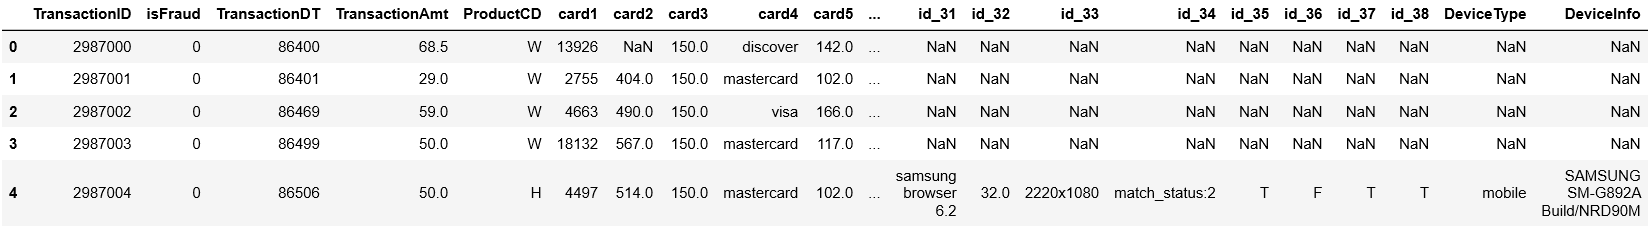

In [5]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/dataset.png')

On remarque que les variables ne sont pas très compréhensibles, de plus, on a énormément de NaN, cela est dû au fait, que non pas toutes les transactions ont une identité correspondante. 

Voyons ça de plus près

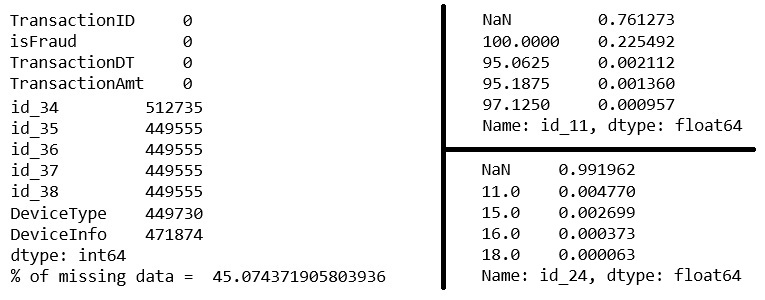

In [15]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/NANtrain.jpg')

D'après nos résultats 45% des données du train sont des valeurs manquantes. Par exemple la variable "ide_11" contient 76% de valeurs manquantes et la variables "id_24" 99%.

Au total, il y a 414 variables contenant des valeurs manquantes. On a décidé de supprimer les variables qui contiennent plus de 80% de NAN.

- __Variables supprimées__:

      dist2
      D6, D7, D8, D9, D12, D13, D14
      V138-V166, V322-V339
      id_03, id_04, id_07, id_08-id_10, id_14, id_18, id_21-id_27', id_30, id_32-id_34
      
 soit 74 variables supprimées. A présent, le train dataset contient 590540 lignes et 360 colonnes et le test dataset, 506691 lignes et 359 colonnes.

## Distribution des variables - train

- __isFraud :__ les transactions frauduleuses labelisées 1 et les transactions non frauduleuses labelisées 0

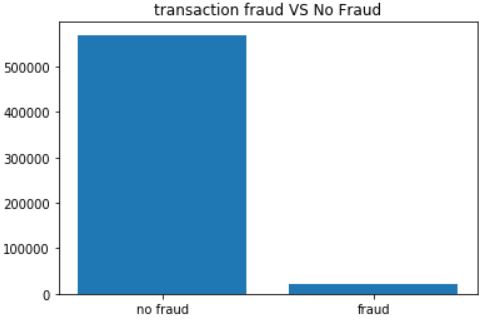

In [9]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/FraudVSnoFraud.jpg')

C'est clair que la plupart des transactions sont non frauduleuses. Si on utilise cette base de données comme base pour nos modèles prédictifs et nos analyses, on pourrait obtenir beaucoup d'erreurs et nos algorithmes seront probablement trop adaptés car ils "supposeront" que la plupart des transactions ne sont pas de la fraude. Mais on ne veut pas que notre modèle suppose mais on veut que notre modèle détecte les modèles qui donnent des signes de fraude.

- __TransactionAMT :__ 
Cette variable représente les montants de transaction

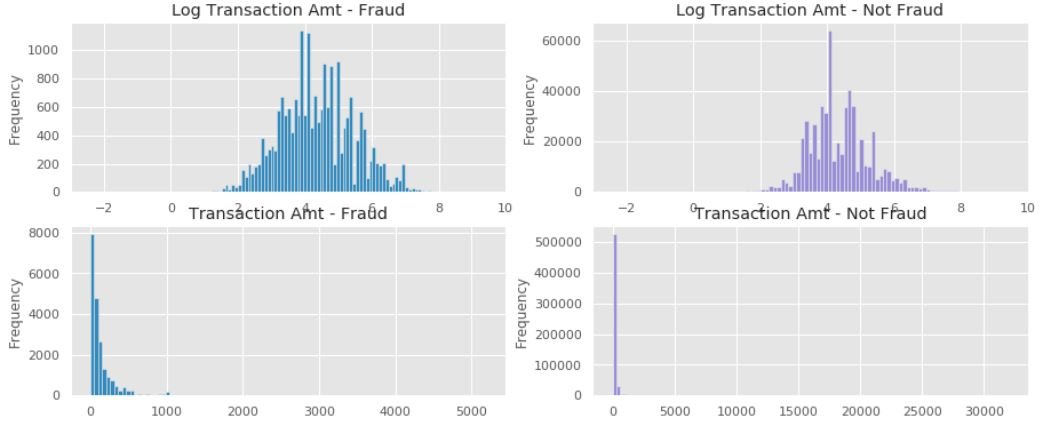

In [16]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/transactionAMT.jpg')

La moyenne du montant des transactions est plus élevée dans le groupe des fraudes, 149.2 contre 134.5 

- __ProductCD :__ représente le code produit, le produit pour chaque transaction

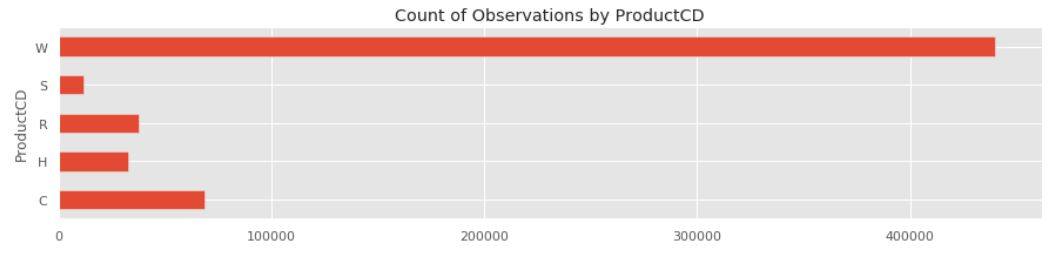

In [18]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/CountProductCD.jpg')

On ne sait pas ce qu'il représente chaque produit, par ailleurs, on peut voir que le produit "W" a le plus grand nombre d'observations et "S" le moins.

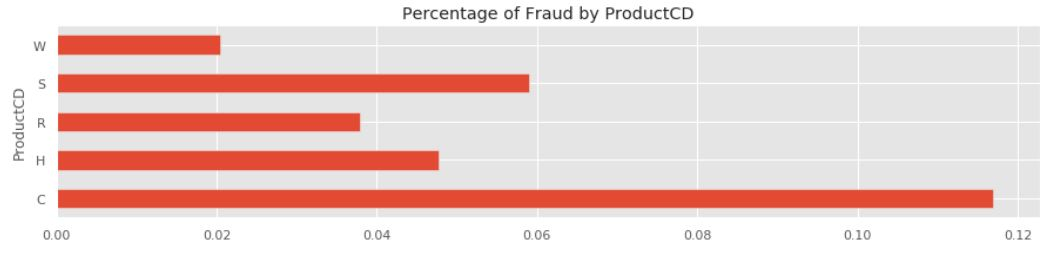

In [19]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/FraudProductCD.jpg')

le produit "C" a le plus grand pourcentage de fraud, plus que 11% et "W" le moins, 2%

- __Card1-Card6 :__ Représentent les informations sur les cartes de paiement, telles que le type de carte, la catégorie de carte, la banque émettrice, credit, débit, etc.

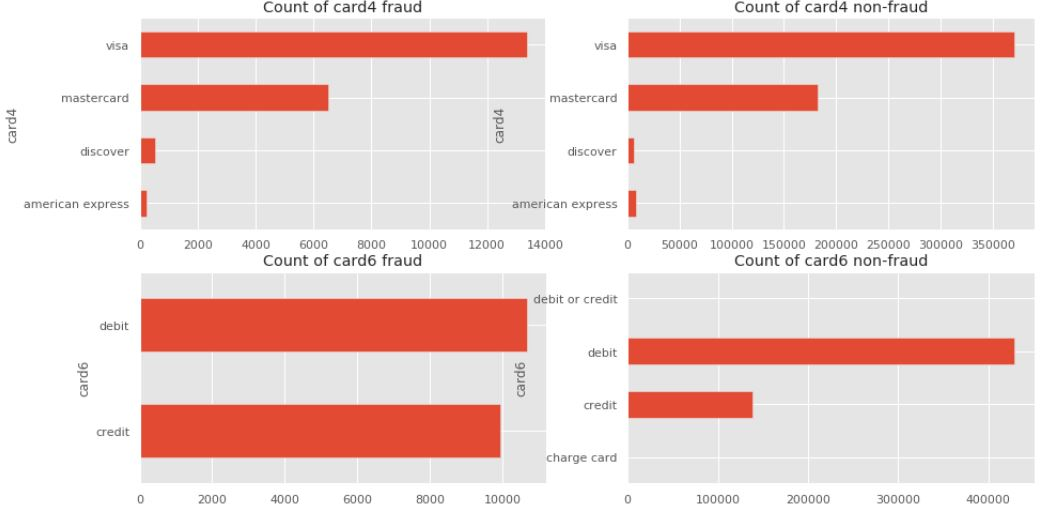

In [1]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/card4-card6.jpg')

Les varibles "card4" et "card6" représentent respectivement le nom de la carte émettrice et le type de transaction. d'après nos résultats présentés ci-dessus, le nombre de non fraude détecté pour la carte Visa vaut presque le triple du nombre de fraude détecté. le nombre de débit est grand dans les deux cas. 

- **DeviceType:**  variable binaire, qui représente le type de l'appareil utilisé "mobile" ou "desktop"

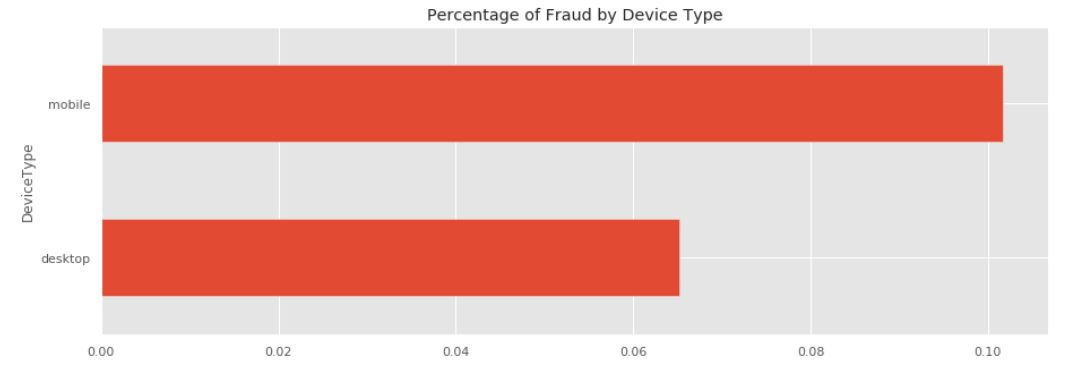

In [2]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/deviceType.jpg')

Le pourcentage des frauds avec un appareil mobile est plus grand qu'avec un appareil fixe.

- **DeviceInfo:** donne des informations sur l'appareil utilisé 

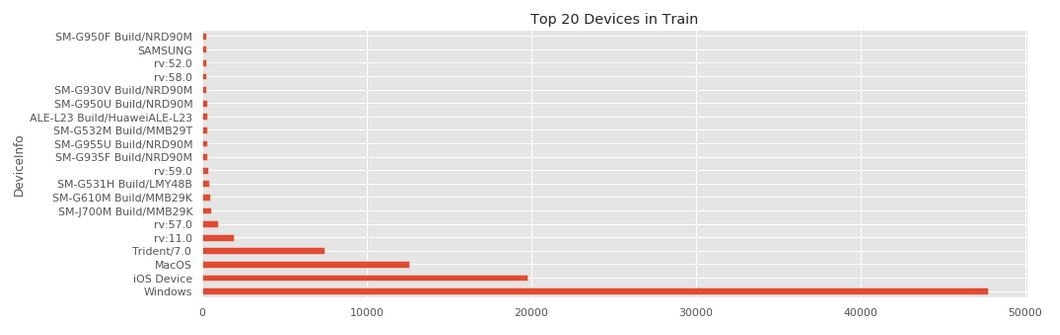

In [3]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/deviceInfo.jpg')

Le système d'exploitation le plus utilisé est Windows 

- **TransactionDT :**  

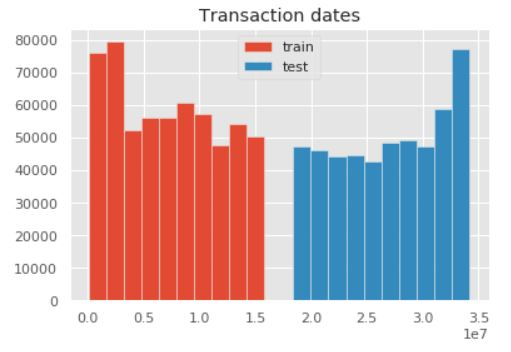

In [5]:
from IPython.display import Image
Image('C:/Users/boubekeur/Documents/datacamp/transactionData.jpg')

Les dates de transactions des données Train et Test ont une intersection vide.